In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('/Users/jacksonsorenson/Documents/Pyhton Projects/Market Research Project/Cleaned CSV/cleaned_marketing_campaign.csv')
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spend,Total_Children,Customer_Tenure,Avg_Monthly_Spend,Recency_Days
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,3,11,1,67,1617,0,149.900000,10.787191,58
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,3,11,0,70,27,2,131.566667,0.205219,38
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,3,11,0,59,776,0,138.200000,5.615051,26
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,3,11,0,40,53,1,132.433333,0.400201,26
4,5324,Phd,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,3,11,0,43,422,1,133.166667,3.168961,94


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [5]:
print(df.describe())

                 ID         Income      Kidhome     Teenhome      Recency  \
count   2240.000000    2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821   52237.975446     0.444196     0.506250    49.109375   
std     3246.662198   25037.955891     0.538398     0.544538    28.962453   
min        0.000000    1730.000000     0.000000     0.000000     0.000000   
25%     2828.250000   35538.750000     0.000000     0.000000    24.000000   
50%     5458.500000   51381.500000     0.000000     0.000000    49.000000   
75%     8427.750000   68289.750000     1.000000     1.000000    74.000000   
max    11191.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.00000

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


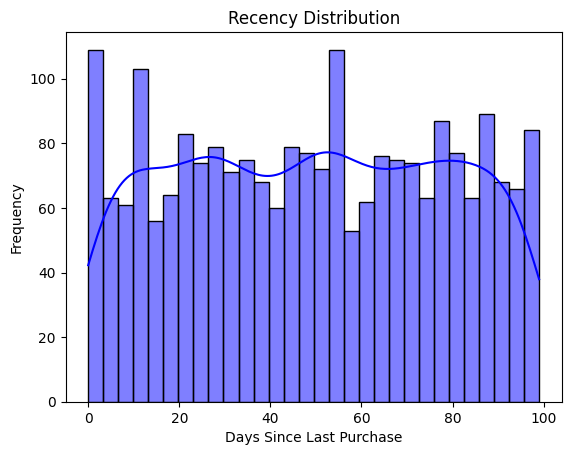

In [6]:
# Check the distribution of Recency to See Where to set the Churn Threshold
print(df['Recency'].describe())

sns.histplot(df['Recency'], bins=30, kde=True, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')
plt.show()


In [7]:
# Creating a Churn Threshold Where Over 74 Days Since Last Purchase Means a Customer has Churned
# Here we are Assuming the Company does not have Consistent Repeat Purchases Which Occur every "x" Amount of Months
churn_threshold = 74
df['Churn'] = (df['Recency'] > churn_threshold).astype(int)

# Verify the new Churn column
print(df['Churn'].value_counts())


Churn
0    1689
1     551
Name: count, dtype: int64


/var/folders/ty/kkyy7c9s4059czrtyxg_0mz40000gn/T/ipykernel_10855/1197579606.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = df.groupby('Age_Group')['Churn'].mean()


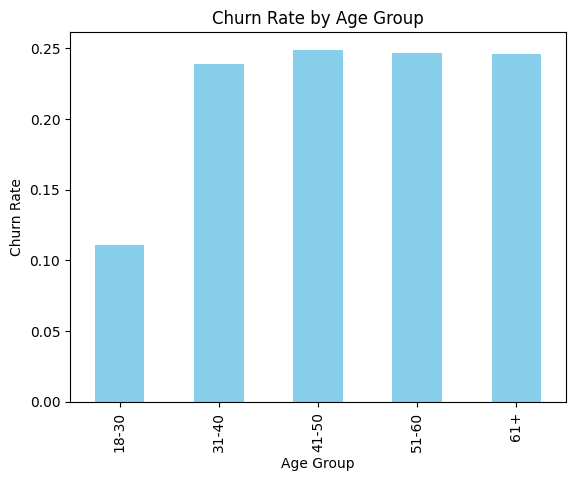

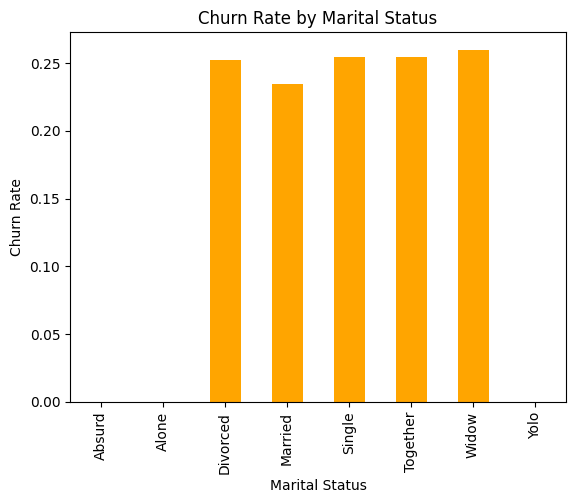

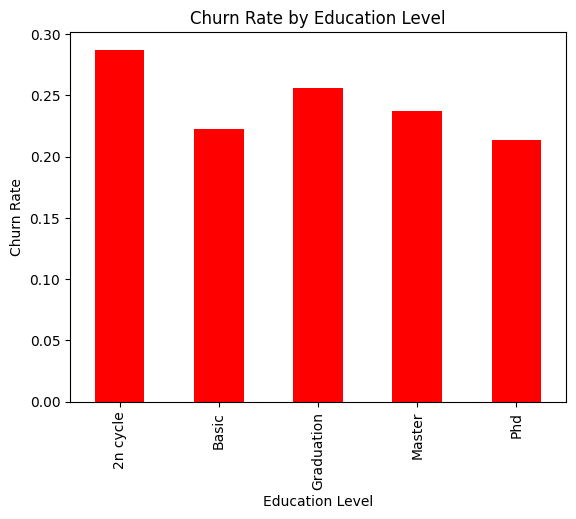

In [23]:
# Seeing Churn Rate Within Segments Based on Age, Marital Status, and Education Level
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '61+'])

churn_by_age = df.groupby('Age_Group')['Churn'].mean()

churn_by_age.plot(kind='bar', color='skyblue', title='Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.xlabel('Age Group')
plt.show()


churn_by_marital = df.groupby('Marital_Status')['Churn'].mean()

churn_by_marital.plot(kind='bar', color='orange', title='Churn Rate by Marital Status')
plt.ylabel('Churn Rate')
plt.xlabel('Marital Status')
plt.show()

churn_by_education = df.groupby('Education')['Churn'].mean()

churn_by_education.plot(kind='bar', color='red', title='Churn Rate by Education Level')
plt.ylabel('Churn Rate')
plt.xlabel('Education Level')
plt.show()


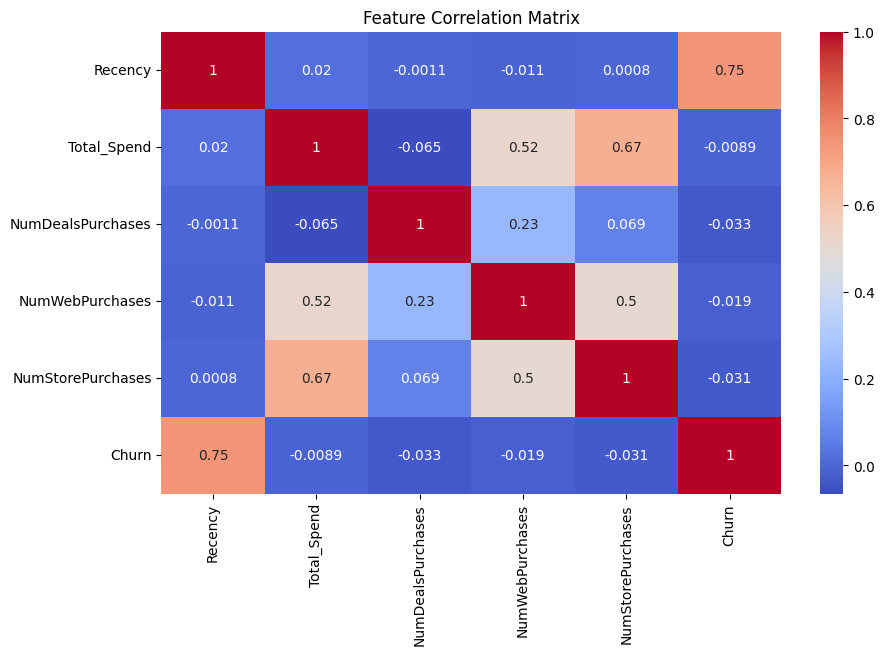

In [9]:
# Correlation matrix for "Place" Data Using Recency of Purchase, Total Spent, Number of Purchases Made with Discount, Number of Web Purchases, and Number of Store Purchases
correlation_matrix = df[['Recency', 'Total_Spend', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'Churn']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# ANALYSIS
# Not a lot of Key Insghts, People who Tend to Spend More Money are Shopping in Person


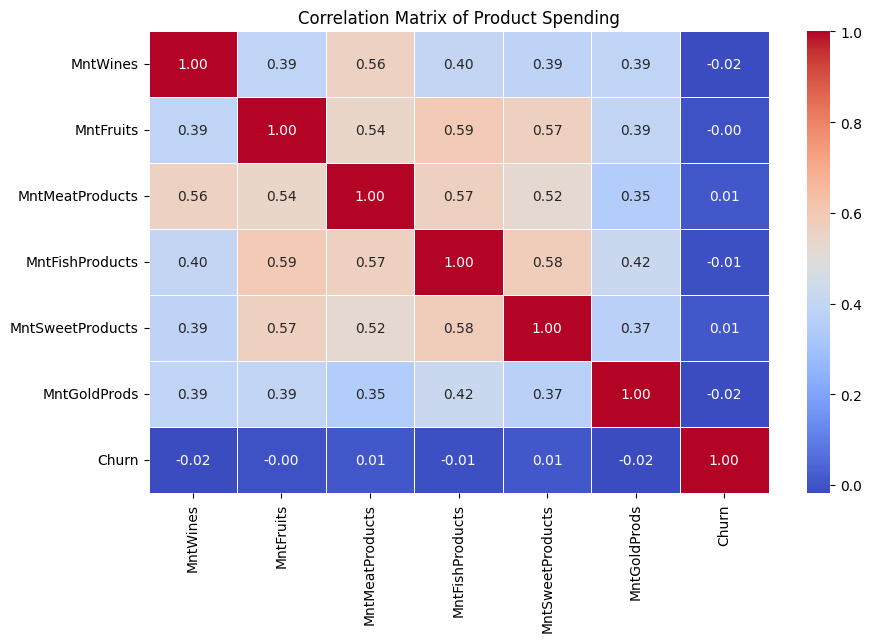

In [10]:
# Correlation matrix for "Product" Data Using Purchase PRoduct Behavior of Wines, Fruits, Meats, Fish, Sweets, and Gold

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Churn']
product_data = df[product_columns]

correlation_matrix = product_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Product Spending')
plt.show()

# ANALYSIS
# Customers who buy Meat products may be targeted with promotions for Fish and Wine
# Fruit buyers could be encouraged to buy Sweets or Fish
# Indicates that gold product purchases are less associated with other spending categories
# This implies that product spending patterns alone may not be a strong predictor of churn

In [11]:

# Doing Some Last Minute Data Cleaning for Categorical Data and Date Data
columns = [
    'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
    'Teenhome', 'Dt_Customer', 'Recency', 'Complain', 'Churn'
]

df_encoded = df.copy()
df_encoded['Education'] = df_encoded['Education'].astype('category').cat.codes
df_encoded['Marital_Status'] = df_encoded['Marital_Status'].astype('category').cat.codes

df_encoded['Dt_Customer'] = pd.to_datetime(df_encoded['Dt_Customer'])
df_encoded['Year_Enrolled'] = df_encoded['Dt_Customer'].dt.year
df_encoded.drop(columns=['Dt_Customer'], inplace=True)


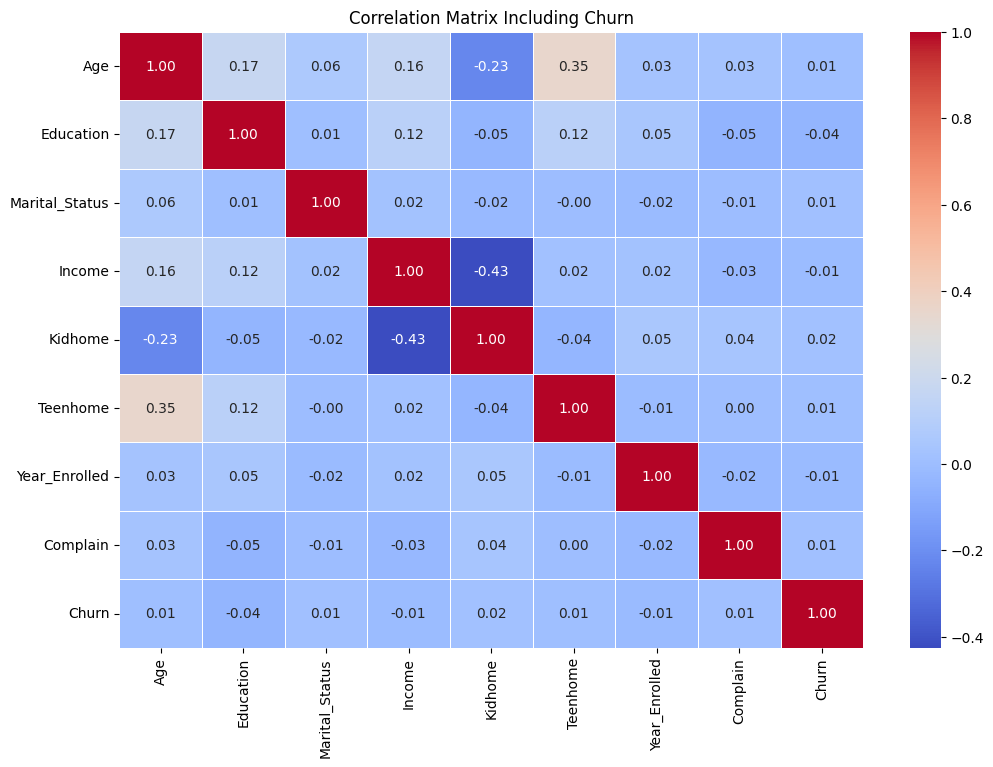

In [12]:
#Correlation Matirix Using "People" Data Using Age, Education Level, Relationship Ststus, Income, Kid Status, Year at Company, Product Complaint, and Churn

correlation_columns = [
    'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
    'Teenhome', 'Year_Enrolled', 'Complain', 'Churn'
]
correlation_data = df_encoded[correlation_columns]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Including Churn')
plt.show()

# ANALYSIS
# None of the variables in this analysis show a strong relationship with churn
# The correlation between Income and Kidhome highlights a potential segmentation opportunity based on household size and financial status

In [13]:
# Feature Engineering How Long A Customer has Been with the Company
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

current_year = datetime.datetime.now().year
df['Tenure'] = current_year - df['Dt_Customer'].dt.year

print(df[['Dt_Customer', 'Tenure']].head())


  Dt_Customer  Tenure
0  2012-09-04      12
1  2014-03-08      10
2  2013-08-21      11
3  2014-02-10      10
4  2014-01-19      10


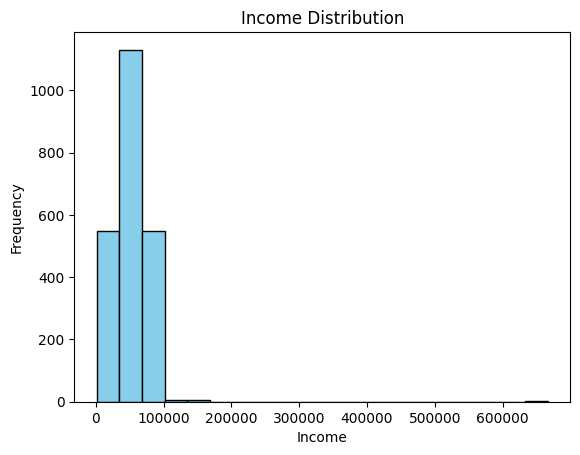

In [14]:
# Struggling to Set up Income Segments, Visualizing Income Distribution
df['Income'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', title='Income Distribution')
plt.xlabel('Income')
plt.show()


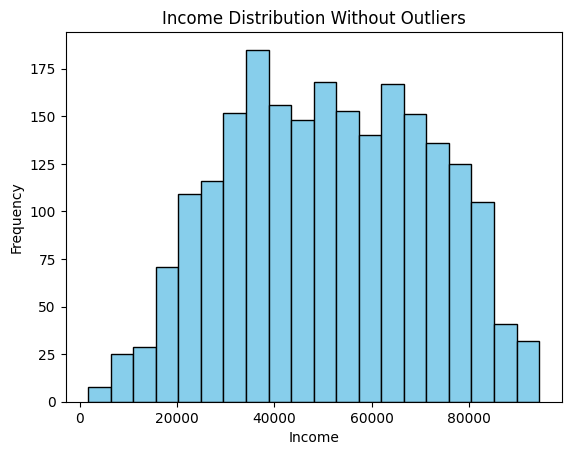

In [15]:
# Removing Outliers From Income Level to Better Split Income Levels into Segments
upper_limit = df['Income'].quantile(0.99)

df = df[df['Income'] <= upper_limit]

df['Income'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', title='Income Distribution Without Outliers')
plt.xlabel('Income')
plt.show()


/var/folders/ty/kkyy7c9s4059czrtyxg_0mz40000gn/T/ipykernel_10855/3901795514.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purchase_by_income = df.groupby('Income_Bracket')['Total_Spend'].mean()


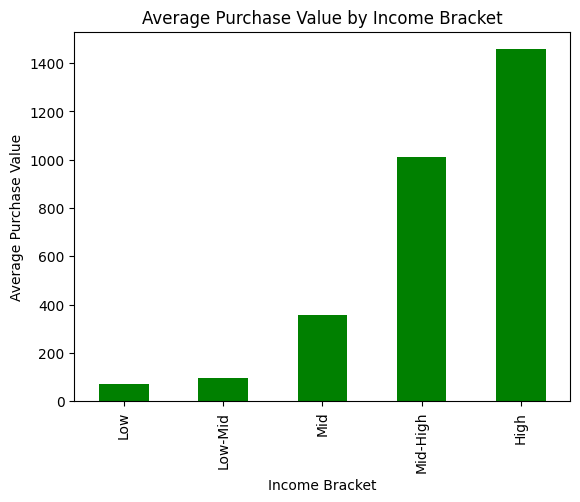

In [16]:
# Splitting Income Levels Into Segments and Displaying Average Purchase Value
df['Income_Bracket'] = pd.cut(
    df['Income'],
    bins=5,  
    labels=['Low', 'Low-Mid', 'Mid', 'Mid-High', 'High'],
    include_lowest=True  #
)

avg_purchase_by_income = df.groupby('Income_Bracket')['Total_Spend'].mean()

avg_purchase_by_income.plot(
    kind='bar', color='green', title='Average Purchase Value by Income Bracket'
)
plt.ylabel('Average Purchase Value')
plt.xlabel('Income Bracket')
plt.show()


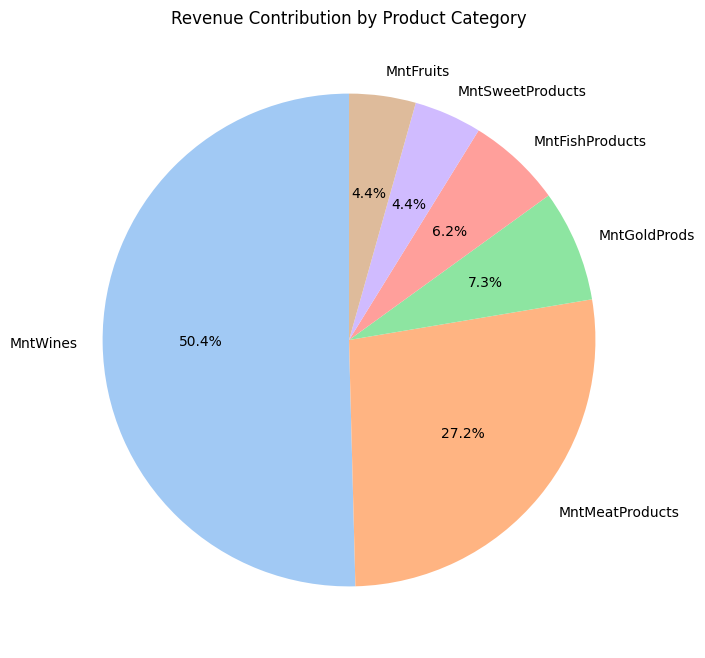

In [17]:
# Displaying Revenue Per Product Category

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
category_contribution = df[product_columns].sum()
category_contribution_percentage = (category_contribution / category_contribution.sum()) * 100
category_contribution_sorted = category_contribution_percentage.sort_values(ascending=False)
category_contribution_sorted_df = category_contribution_sorted.reset_index()
category_contribution_sorted_df.columns = ['Product Category', 'Percentage Contribution']

plt.figure(figsize=(8, 8))
plt.pie(
    category_contribution_sorted_df['Percentage Contribution'],
    labels=category_contribution_sorted_df['Product Category'],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90
)
plt.title('Revenue Contribution by Product Category')
plt.show()


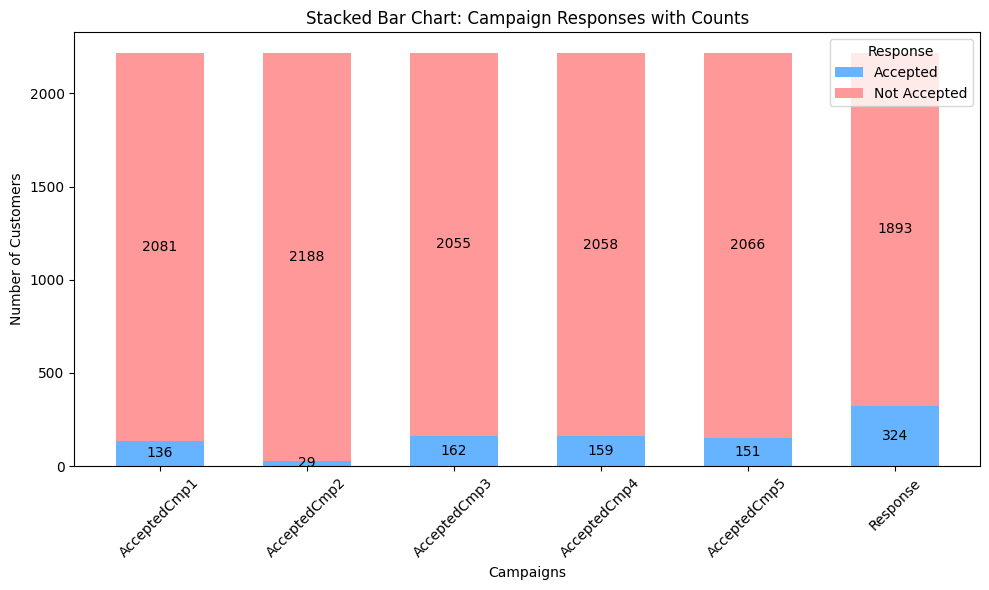

In [18]:
# Visualizing Campaign Sucess Rate and Creating a Stacked Bar Chart to See if Customers Accepted the Promotion or Not

campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

accepted_counts = df[campaign_columns].sum()
not_accepted_counts = len(df) - accepted_counts

campaign_data = pd.DataFrame({
    'Accepted': accepted_counts,
    'Not Accepted': not_accepted_counts
})

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6


indices = np.arange(len(campaign_columns))

accepted_bars = ax.bar(indices, campaign_data['Accepted'], bar_width, label='Accepted', color='#66b3ff')
not_accepted_bars = ax.bar(indices, campaign_data['Not Accepted'], bar_width, bottom=campaign_data['Accepted'], label='Not Accepted', color='#ff9999')

for i, (accepted, not_accepted) in enumerate(zip(campaign_data['Accepted'], campaign_data['Not Accepted'])):
    ax.text(i, accepted / 2, f'{int(accepted)}', ha='center', va='center', color='black', fontsize=10)
    ax.text(i, accepted + not_accepted / 2, f'{int(not_accepted)}', ha='center', va='center', color='black', fontsize=10)

ax.set_title('Stacked Bar Chart: Campaign Responses with Counts')
ax.set_xlabel('Campaigns')
ax.set_ylabel('Number of Customers')
ax.set_xticks(indices)
ax.set_xticklabels(campaign_columns, rotation=45)
ax.legend(title='Response')

plt.tight_layout()
plt.show()


/var/folders/ty/kkyy7c9s4059czrtyxg_0mz40000gn/T/ipykernel_10855/4174436477.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age = df.groupby('Age_Group')[product_columns].mean()


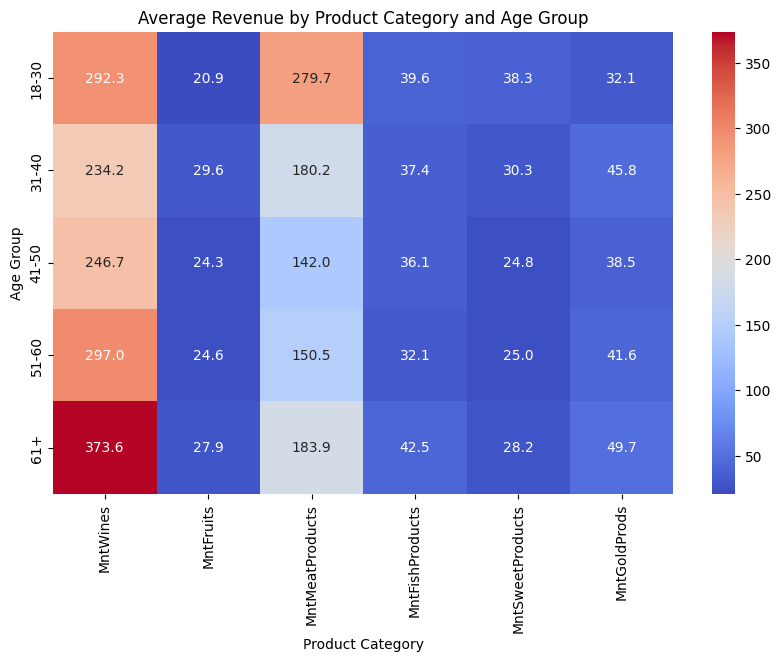

In [19]:
# Revenue Heatmap by Product and Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '61+'])

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
revenue_by_age = df.groupby('Age_Group')[product_columns].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(revenue_by_age, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average Revenue by Product Category and Age Group')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.show()

# ANALYSIS
# Prioritize "MntWines" and "MntMeatProducts" for all age groups, as they yield the highest revenues
# For older demographics (61+), emphasize premium products like "MntGoldProds" alongside wines
# Younger audiences might respond to promotions in meat products and wines

# Consider introducing premium or bundled products in "MntWines" and "MntMeatProducts" to further boost revenue

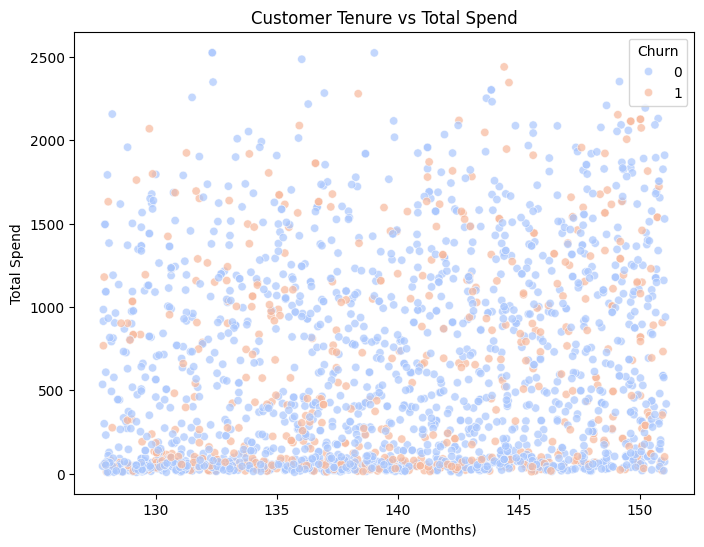

In [20]:
# Scatter Plot of Customer Tenure vs. Total Spend
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Customer_Tenure', y='Total_Spend', hue='Churn', palette='coolwarm', alpha=0.7)
plt.title('Customer Tenure vs Total Spend')
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Total Spend')
plt.legend(title='Churn')
plt.show()

# ANALYSIS
# No Apparent Correlation


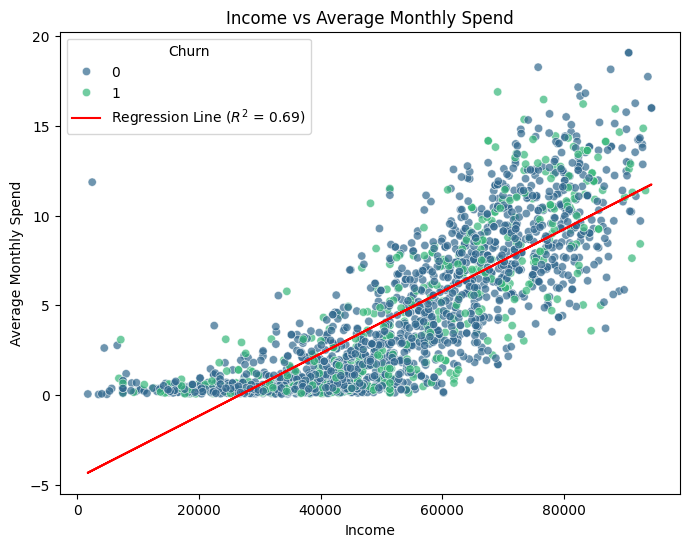

In [21]:
# Scatter Plot of Income vs. Average Monthly Spend

X = df['Income'].values.reshape(-1, 1)  
y = df['Avg_Monthly_Spend'].values  

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

r_squared = r2_score(y, y_pred)


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Avg_Monthly_Spend', hue='Churn', palette='viridis', alpha=0.7)
plt.plot(df['Income'], y_pred, color='red', label=f'Regression Line ($R^2$ = {r_squared:.2f})')
plt.title('Income vs Average Monthly Spend')
plt.xlabel('Income')
plt.ylabel('Average Monthly Spend')
plt.legend(title='Churn')
plt.show()

# ANALYSIS
# The regression model shows a strong, positive correlation between Income and Average Monthly Spend (R2 = 0.69)

/var/folders/ty/kkyy7c9s4059czrtyxg_0mz40000gn/T/ipykernel_10855/1037384280.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age_marital = df_filtered.groupby(['Age_Group', 'Marital_Status'])['Churn'].mean().unstack()


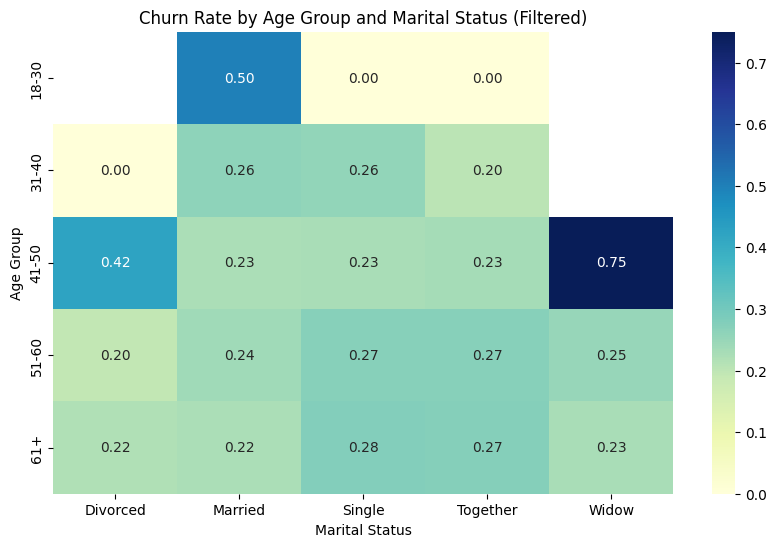

In [22]:
# Churn Rate by Age Group and Marital Status

# Dropping People in These Categories, so few of Them in Dataset
df_filtered = df[~df['Marital_Status'].isin(['Yolo', 'Alone', 'Absurd'])]


churn_by_age_marital = df_filtered.groupby(['Age_Group', 'Marital_Status'])['Churn'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(churn_by_age_marital, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Churn Rate by Age Group and Marital Status (Filtered)')
plt.xlabel('Marital Status')
plt.ylabel('Age Group')
plt.show()

# ANALYSIS: 

# The 50% churn rate for divorced individuals aged 18-30 might reflect life instability or lower income in this demographic
# Targeted offers or loyalty incentives could help reduce churn in this segment

# The exceptionally high churn rate (75%) in the "41-50" widow category suggests this group might face unique challenges. Exploring reasons (e.g., financial burden or loss of interest) could help address this issue

# Older age groups (51-60 and 61+) show low, consistent churn rates across most marital statuses, indicating these groups are relatively stable and satisfied
